# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VARMAX

# Format the Data

In [3]:
# Read in both datasets. The first has several key figures, the second has Housing_auth.
data = pd.read_csv('V3_data_1997.csv', parse_dates=['DATE'], index_col=['DATE'])
housing = pd.read_csv('Housing_Auth_Full_Quarterly.csv', parse_dates=['DATE'], index_col=['DATE'])

# Remove 2020 from the dataset.
cleaned = data[:-5]

# Adjust the housing price index for inflation.
cleaned.loc[:, 'Housing_Increase']  = cleaned.loc[:, 'Housing_Price_Index'] / cleaned.loc[:, 'Consumption_HH']

# Drop all irrelevant columns.
cleaned.drop(cleaned.columns.difference(['Housing_Increase']), 1, inplace=True)

# Combine the two sets.
cleaned = cleaned.join(housing)

# Take a forward difference.
diff = cleaned.diff(1)
diff = diff[1:]

# Normalize the result.
data = diff / diff.abs().max()
data

,Housing_Increase,Housing_auth
DATE,,
1997-04-01,0.088514,0.262765
1997-07-01,0.309797,-0.041895
1997-10-01,0.283679,0.306544
1998-01-01,-0.696677,-0.154122
1998-04-01,0.150411,-0.058554
...,...,...
2018-10-01,0.146505,-0.002125
2019-01-01,-0.398298,0.011777
2019-04-01,0.225050,0.465534


# Run an ARIMA Model on the Housing Price Increase (Adjusted for Inflation) and Housing Authorized

/home/reece/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


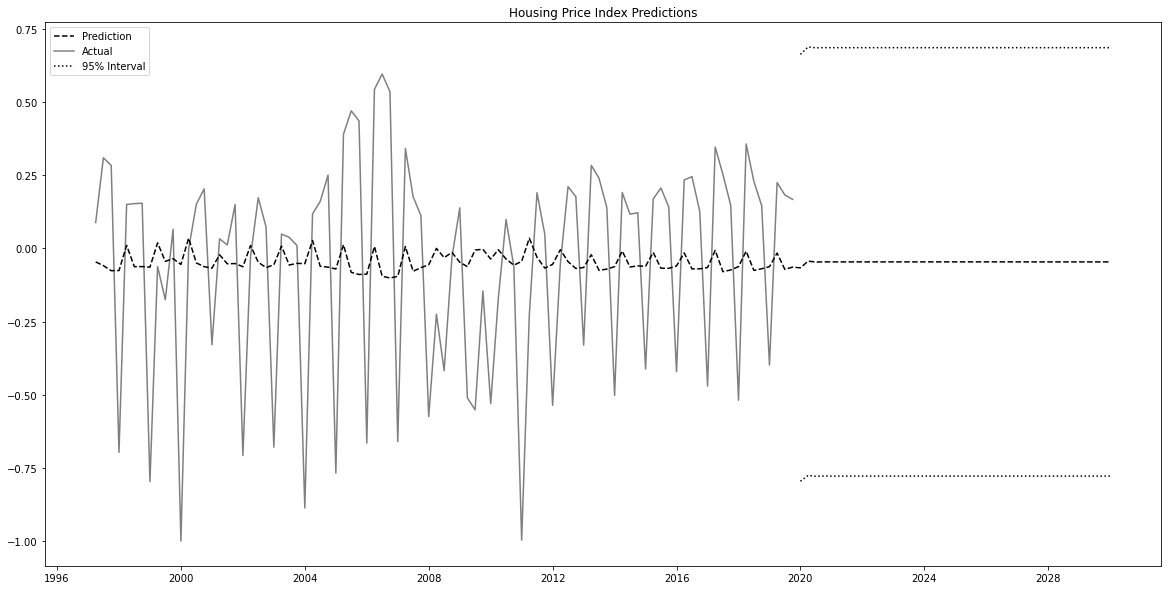

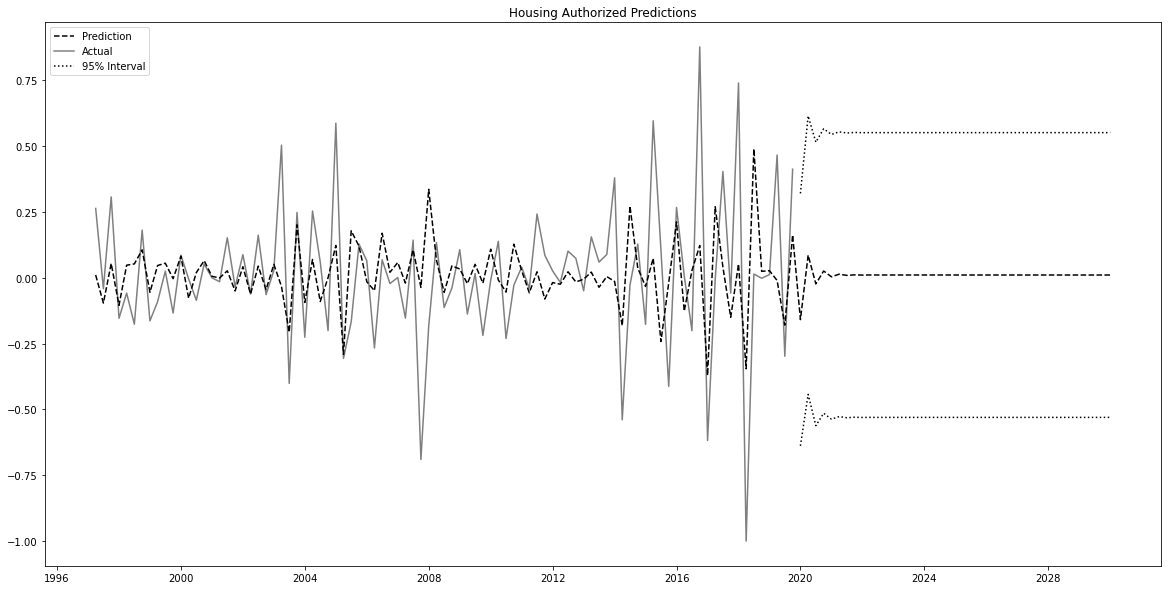

In [4]:
# Define the interval to predict on
start='1997-04-01'
end='2030-01-01'

# Initialize and fit model.
mod = VARMAX(data)
mod = mod.fit(maxiter=1000, disp=False, ic='aic')

# Predict.
pred = mod.predict(start, end)

# Get confidence intervals.
forecast_obj = mod.get_forecast(end)
all_CI = forecast_obj.conf_int(alpha=0.05)
all_CI

# Plot Housing Increase predictions against the true data.
fig = plt.figure(figsize=(20, 10))
plt.plot(pred['Housing_Increase'], 'k--', label='Prediction')
plt.plot(data['Housing_Increase'], 'k', alpha=0.5, label='Actual')
plt.plot(all_CI['lower Housing_Increase'], 'k:', label='95% Interval')
plt.plot(all_CI['upper Housing_Increase'], 'k:')
plt.legend(loc='upper left')
plt.title('Housing Price Index Predictions')
plt.show()

# Plot Housing Authorizations predictions against the true data.
fig = plt.figure(figsize=(20, 10))
plt.plot(pred['Housing_auth'], 'k--', label='Prediction')
plt.plot(data['Housing_auth'], 'k', alpha=0.5, label='Actual')
plt.plot(all_CI['lower Housing_auth'], 'k:', label='95% Interval')
plt.plot(all_CI['upper Housing_auth'], 'k:')
plt.legend(loc='upper left')
plt.title('Housing Authorized Predictions')
plt.show()

# Repeat the Experiment with Adjusted Housing Increase Data. 

In [40]:
new_data = data.copy()
n = len(new_data)
a = 7

for i in range(0, 10):
    new_data.iloc[(n-(10*a)) + a*i : (n-(10*a)) + a*(i+1)]['Housing_auth'] += i

# # Normalize the result.
new_data = new_data / new_data.abs().max()
new_data

,Housing_Increase,Housing_auth
DATE,,
1997-04-01,0.088514,0.027760
1997-07-01,0.309797,-0.004426
1997-10-01,0.283679,0.032385
1998-01-01,-0.696677,-0.016282
1998-04-01,0.150411,-0.006186
...,...,...
2018-10-01,0.146505,0.950594
2019-01-01,-0.398298,0.952062
2019-04-01,0.225050,1.000000


/home/reece/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


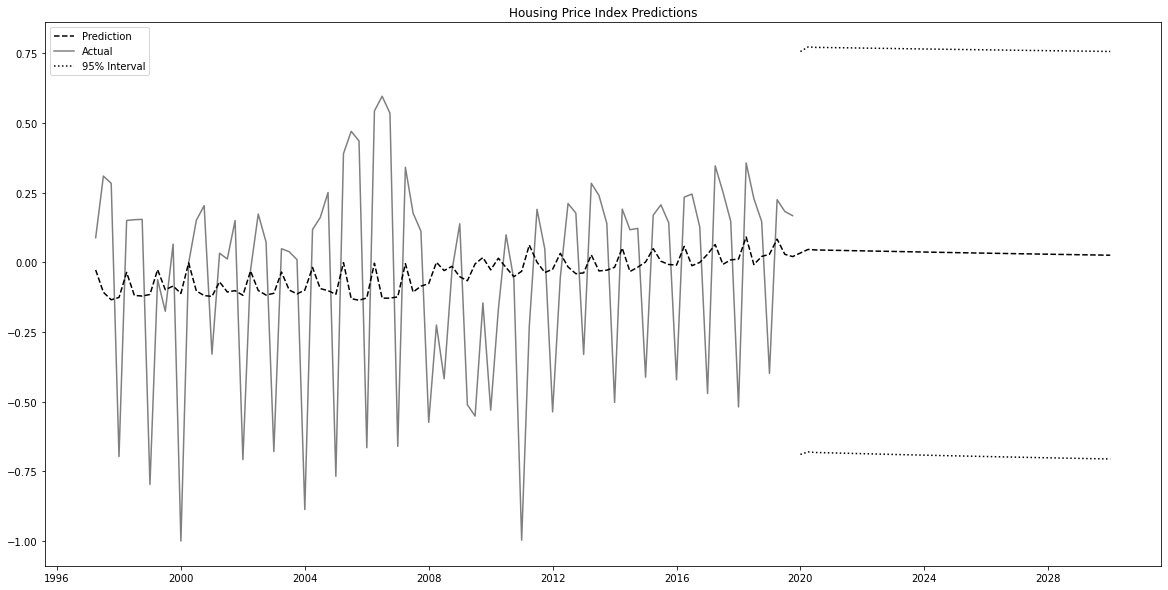

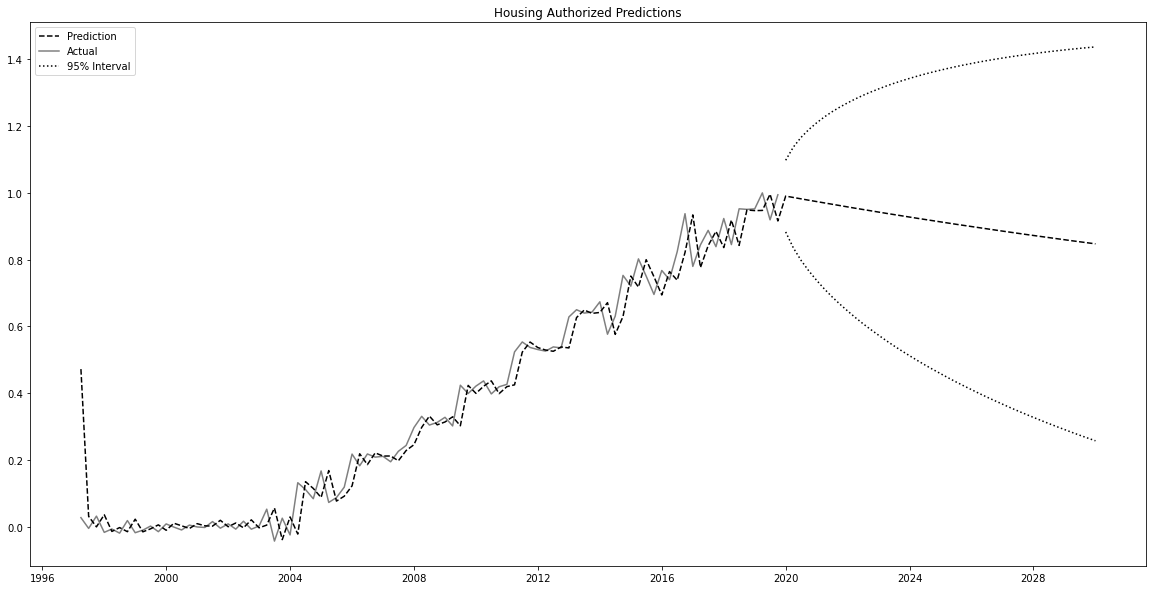

In [41]:
# Define the interval to predict on
start='1997-04-01'
end='2030-01-01'

# Initialize and fit model.
mod = VARMAX(new_data)
mod = mod.fit(maxiter=1000, disp=False, ic='aic')

# Predict.
pred = mod.predict(start, end)

# Get confidence intervals.
forecast_obj = mod.get_forecast(end)
all_CI = forecast_obj.conf_int(alpha=0.05)
all_CI

# Plot Housing Increase predictions against the true data.
fig = plt.figure(figsize=(20, 10))
plt.plot(pred['Housing_Increase'], 'k--', label='Prediction')
plt.plot(new_data['Housing_Increase'], 'k', alpha=0.5, label='Actual')
plt.plot(all_CI['lower Housing_Increase'], 'k:', label='95% Interval')
plt.plot(all_CI['upper Housing_Increase'], 'k:')
plt.legend(loc='upper left')
plt.title('Housing Price Index Predictions')
plt.show()

# Plot Housing Authorizations predictions against the true data.
fig = plt.figure(figsize=(20, 10))
plt.plot(pred['Housing_auth'], 'k--', label='Prediction')
plt.plot(new_data['Housing_auth'], 'k', alpha=0.5, label='Actual')
plt.plot(all_CI['lower Housing_auth'], 'k:', label='95% Interval')
plt.plot(all_CI['upper Housing_auth'], 'k:')
plt.legend(loc='upper left')
plt.title('Housing Authorized Predictions')
plt.show()